In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import hyperparameters as hp

Using TensorFlow backend.


In [ ]:
train = "data/output/train"
validation = "data/output/val"
test = "data/output/test"

In [9]:
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
    directory=train,
    target_size=(hp.img_height, hp.img_width),
    color_mode="rgb",
    batch_size=hp.batch_size,
    class_mode="binary",
    shuffle=True,
    seed=42
)

validation_generator = datagen.flow_from_directory(
    directory=validation,
    target_size=(hp.img_height, hp.img_width),
    color_mode="rgb",
    batch_size=hp.batch_size,
    class_mode="binary",
    shuffle=True,
    seed=42
)

Found 799 images belonging to 2 classes.
Found 99 images belonging to 2 classes.


In [10]:
model = tf.keras.models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3),  activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

2022-05-31 03:50:50.842691: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-31 03:50:50.847494: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [12]:
results= model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=hp.epochs
)

Train for 8 steps, validate for 1 steps
Epoch 1/15
8/8 [==============================] - 50s 6s/step - loss: 1.9891 - accuracy: 0.6708 - val_loss: 0.5946 - val_accuracy: 0.6667
Epoch 2/15
8/8 [==============================] - 49s 6s/step - loss: 0.4870 - accuracy: 0.8060 - val_loss: 0.4915 - val_accuracy: 0.7576

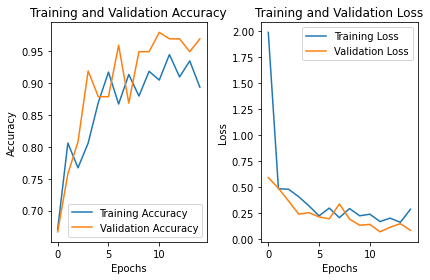

In [19]:
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']

loss = results.history['loss']
val_loss = results.history['val_loss']

epochs_range = range(hp.epochs)

fig, ax = plt.subplots(1, 2)
ax[0].plot(epochs_range, acc, label='Training Accuracy')
ax[0].plot(epochs_range, val_acc, label='Validation Accuracy')
ax[0].legend(loc='lower right')
ax[0].set(title="Training and Validation Accuracy", xlabel="Epochs", ylabel="Accuracy")

ax[1].plot(epochs_range, loss, label='Training Loss')
ax[1].plot(epochs_range, val_loss, label='Validation Loss')
ax[1].legend(loc='upper right')
ax[1].set(title="Training and Validation Loss", xlabel="Epochs", ylabel="Loss")

fig.tight_layout()
plt.show()